### Import Packages & Load Dataset

In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

dataset = pd.read_csv('transaction.csv')
dataset.head()

,InvoiceNo,StockCode,Qty,InvoiceDate,CustomerID,Country
0,537626,22725,830,12/7/2010 14:57,12347,Iceland
1,537626,22729,948,12/7/2010 14:57,12347,Iceland
2,537626,22195,695,12/7/2010 14:57,12347,Iceland
3,542237,22725,636,1/26/2011 14:30,12347,Iceland
4,542237,22729,536,1/26/2011 14:30,12347,Iceland


### Data Exploration

In [2]:
country = dataset['Country'].value_counts()
country

Country
Germany                 2269
France                  2109
EIRE                    1620
Netherlands              634
Spain                    539
Belgium                  486
Switzerland              434
Portugal                 367
Australia                356
Norway                   239
Italy                    190
Channel Islands          184
Finland                  152
Cyprus                   113
Sweden                   109
Denmark                   98
Japan                     92
Austria                   88
Poland                    80
Israel                    61
USA                       47
Singapore                 45
Unspecified               44
Canada                    36
Iceland                   35
Greece                    33
United Arab Emirates      23
Malta                     15
RSA                       14
Brazil                     8
Lithuania                  8
Lebanon                    5
European Community         5
Czech Republic             4
Bahrai

In [3]:
transaksi = dataset.groupby('Country')['InvoiceNo'].nunique()
transaksi = pd.DataFrame({'Country': transaksi.index, 'Transaction Count': transaksi.values})
print(transaksi)

                 Country  Transaction Count
0              Australia                 44
1                Austria                 12
2                Bahrain                  1
3                Belgium                 84
4                 Brazil                  1
5                 Canada                  3
6        Channel Islands                 21
7                 Cyprus                 16
8         Czech Republic                  2
9                Denmark                 18
10                  EIRE                224
11    European Community                  3
12               Finland                 26
13                France                344
14               Germany                377
15                Greece                  5
16               Iceland                  6
17                Israel                  4
18                 Italy                 31
19                 Japan                 14
20               Lebanon                  1
21             Lithuania        

### Clustering

In [4]:
avg_linkage = AgglomerativeClustering(n_clusters = 3, linkage = 'average')
transaksi['Cluster'] = avg_linkage.fit_predict(transaksi[['Transaction Count']])
print(transaksi)

                 Country  Transaction Count  Cluster
0              Australia                 44        0
1                Austria                 12        0
2                Bahrain                  1        0
3                Belgium                 84        0
4                 Brazil                  1        0
5                 Canada                  3        0
6        Channel Islands                 21        0
7                 Cyprus                 16        0
8         Czech Republic                  2        0
9                Denmark                 18        0
10                  EIRE                224        2
11    European Community                  3        0
12               Finland                 26        0
13                France                344        1
14               Germany                377        1
15                Greece                  5        0
16               Iceland                  6        0
17                Israel                  4   

In [5]:
centroid = transaksi.groupby('Cluster')['Transaction Count'].mean()
centroid

Cluster
0     18.787879
1    360.500000
2    224.000000
Name: Transaction Count, dtype: float64

In [6]:
sorted_ = centroid.sort_values(ascending = True)
sorted_

Cluster
0     18.787879
2    224.000000
1    360.500000
Name: Transaction Count, dtype: float64

In [7]:
low_clust_index = sorted_.index[0]
medium_clust_index = sorted_.index[1]
high_clust_index = sorted_.index[-1]

low_clust = transaksi[transaksi['Cluster'] == low_clust_index]['Country'].tolist()
medium_clust = transaksi[transaksi['Cluster'] == medium_clust_index]['Country'].tolist()
high_clust = transaksi[transaksi['Cluster'] == high_clust_index]['Country'].tolist()

print(f'Countries with low transactions:\n{low_clust}\n')
print(f'Countries with medium transactions: {medium_clust}\n')
print(f'Countries with high transactions: {high_clust}')

Countries with low transactions:
['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada', 'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'European Community', 'Finland', 'Greece', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'USA', 'United Arab Emirates', 'Unspecified']

Countries with medium transactions: ['EIRE']

Countries with high transactions: ['France', 'Germany']


### Visualization

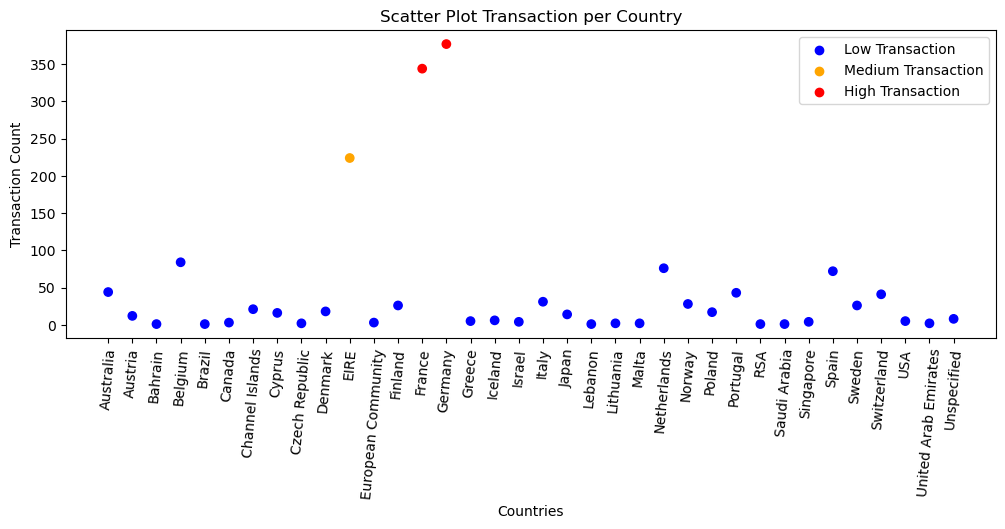

In [8]:
colors = transaksi['Cluster'].map({low_clust_index: 'blue',
                                   medium_clust_index: 'orange',
                                   high_clust_index: 'red'})

plt.figure(figsize = (12, 4))
plt.scatter(transaksi['Country'], transaksi['Transaction Count'], c = colors)
plt.xlabel('Countries')
plt.ylabel('Transaction Count')
plt.title('Scatter Plot Transaction per Country')
plt.scatter([], [], color = 'blue', label = 'Low Transaction')
plt.scatter([], [], color = 'orange', label = 'Medium Transaction')
plt.scatter([], [], color = 'red', label = 'High Transaction')
plt.legend()
plt.xticks(rotation = 85)
plt.show()